<a href="https://colab.research.google.com/github/BrianChegeGichau/Titanicdataset/blob/master/Week9Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

# Understanding the Context

The RMS Titanic was a luxury British steamship that sank in the early hours of April,15 1912 after striking an iceberg leading to the deaths of more than 1500 passengers and crew. Of the 2240 passengers and crew on board, more than 1500 lost their lives in the disaster. 

The Titanic started its maiden voyage from Southampton, England on April,10, 1912. After stops in Cherbough, France and Queenstown, Ireland, the ship set sail for New York with 2,240 passengers and crew. The ship had high-ranking officials, wealthy industrialists, dignitaries and celebrities. 706 people survived the sinking of the Titanic. 

Titanic nearly perpendicular and many of her lights still aglow finally dove beneath the oceans surface at about 02:20 am on April 15,1972.

# Specifying the Question

I will be using the K-Nearest Neighbors for my analysis. The function is only approximated locally and all computation is deferred until function evaluation. 
I will be improving the model performance using the different metrics used such as the minkowski and the manhattan.

While there was some element of luck involved in surviving it seems some groups of people were more likely to survive than others.In this challenge, I will build a predictive model that answers the question: “What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Metrics for Success

The following are what i'll use as my accountability to ensure success in my analysis:



*   Find out the circumstances one was in to survive the Titanic drown
*   Fit the models in the K-Nearest Neighbor model and obtain the best parameters for the model. I also want to obtain an accuracy of 85% in my model.
*   Get comprehensive evaluations and conclusion for my analysis.

I will be using the accuracy metric and f1 score to measure the performance of my model.



# The Experimental Design

The following steps will be undertaken during this study:

Reading and exploring the dataset.

*   Data Cleaning; Dealing with outliers, anomalies and missing data to answer the given question.
*   Perform univariate, bivariate analysis and multi-variate analysis and recording observations.
*   Checking for multi-collinearity.
*   Fitting my data into the K-Nearest Neighbors and obtaining the best paramters for the model.
*   Providing comprehensive recommendations based on my study.
*   Challenging my solution by providing insights on how to make model improvements.



# 2. Reading the dataset

In [ ]:
#Importing the necessary library to read the dataset
import pandas as pd
#Reading the dataset and previewing the head
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Setting the passenger id to be our index and previewing the changes
train = train.set_index('PassengerId')
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Finding more about the number of columns and rows
print('The train dataset has ', train.shape[1], 'columns and ', train.shape[0], 'rows.')

The train dataset has  11 columns and  891 rows.


In [ ]:
#Finding out about the datatypes of our train dataset
train.info()
#The datatypes of our columns are in their correct format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
#Doing basic statistics of the train dataset
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I imported the test dataset to use it for the Exploratory Data Analysis.

In [ ]:
#Reading and previewing the test dataset
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Setting the Passenger Id as our index column
test = test.set_index('PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Finding out the number of columns and rows in our test dataset
print('The test dataset has ', test.shape[1], 'columns and ', test.shape[0], 'rows.')

The test dataset has  10 columns and  418 rows.


In [ ]:
#Finding out the dataset column types
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
#Finding out the basic statistics of the test data
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Column Description



*   Survived : This shows whether the individual survived or not.(0 = No; 1 = Yes)
*   Pclass : This shows the socio-economic class of the passenger where the first class shows a fairly stable economic individual while the third class shows a less stable economic individual. (1  = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
*   Name : This shows the name of the individual.
*   Sex : This shows the gender of the individual.
*   Age : This column shows the estimate of the ages of the individual.
*   Sibsp : This column shows the number of siblings/ spouses on board.
*   Parch : This columns shows the number of parents/childern on board.
*   Ticket Number : This shows the ticket number of the passenger on board.
*   Fare : This column shows the amount of transport money the individual paid.
*   Cabin : This shows the cabin or area one was in during the voyage.
*   Embarked : This column shows the port where the individual embarked on; C representing Cherbough, Q representing Queenstown, S representing Southampton.



# 3. Feature Engineering

In [ ]:
#Setting the column names to be of lower case and stripping any spaces between them
train.columns = train.columns.str.strip().str.lower()
test.columns = test.columns.str.strip().str.lower()

I needed to find out whether one's royalty,profession,status had a higher chances of survival. So I'll be picking the titles from the names since I noticed the different Mr, Mrs from the names column.

In [ ]:
#Extracting the title of the individuals aboard.
train['title'] = train.name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
test['title'] = test.name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [ ]:
#Dropping the names from the train and test data
train = train.drop(['name'],axis=1)
test = test.drop(['name'],axis=1)

I also wanted to find out whether the position one had in the ship had a chance of survival compared to the rest. Though it had very many missing values, since the cabin column seemed to have a letter in the beginning which I believed where the different decks in the ship

In [ ]:
#Extracting the deck from the cabin column using the first letter in the string
train["deck"] = train["cabin"].str.slice(0,1)
test["deck"] = test["cabin"].str.slice(0,1)

In [ ]:
#Dropping the cabin column since its no longer useful
train = train.drop(['cabin'],axis=1)
test = test.drop(['cabin'],axis=1)

In [ ]:
#Since the ship had families attributed to the sibsp and parch column, I added up the two columns 
#and also the individual whose name was there
train['family_size'] = train['sibsp'] + train['parch'] + 1
test['family_size'] = test['sibsp'] + test['parch'] + 1

In [ ]:
#Dropping the sibsp, parch and ticket columns. I believed the ticket was unique and had no
#information attributed to it probably the location which our embarked column had
train = train.drop(['sibsp','parch','ticket'],axis=1)
test = test.drop(['sibsp','parch','ticket'],axis=1)

In [ ]:
#I decided to fill the deck column with zeros.
train['deck'] = train['deck'].fillna(0)
test['deck'] = test['deck'].fillna(0)

In [ ]:
#Replacing the C,Q and S with their respective embarked areas.
train['embarked'] = train['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])
test['embarked'] = test['embarked'].replace(['C','Q','S'],['Cherbough','Queenstown','Southampton'])

In [ ]:
#Previewing the changes in our dataset
train.head()

,survived,pclass,sex,age,fare,embarked,title,deck,family_size
PassengerId,,,,,,,,,
1,0,3,male,22.0,7.2500,Southampton,Mr,0,2
2,1,1,female,38.0,71.2833,Cherbough,Mrs,C,2
3,1,3,female,26.0,7.9250,Southampton,Miss,0,1
4,1,1,female,35.0,53.1000,Southampton,Mrs,C,2
5,0,3,male,35.0,8.0500,Southampton,Mr,0,1


# 3. Cleaning the dataset

In [ ]:
#Concating the train and test data for the Exploratory Data Analysis and checking its shape
df = pd.concat([train, test], sort = False)
df.shape

(1309, 9)

Our total number of entries in the Titanic Dataset had 1309 rows and 9 columns.

In [ ]:
#Checking for null values
print(df.isnull().sum())
print('\n')
print('Train dataset missing values.')
train.isnull().sum()

survived       418
pclass           0
sex              0
age            263
fare             1
embarked         2
title            0
deck             0
family_size      0
dtype: int64


Train dataset missing values.


survived         0
pclass           0
sex              0
age            177
fare             0
embarked         2
title            0
deck             0
family_size      0
dtype: int64

The Survived column missing values was expected since the test data did not have the survived column. The fare column and embarked missing values will be dropped and the age column missing values will be filled with the mean age.

In [ ]:
#Filling the missing ages with the mean in the combined column and in the train data
df['age'].fillna(df['age'].mean(),inplace=True)
train['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
#Dropping the missing values in the fare and embarked column in both in the train and combined column
df = df.dropna(subset = ['fare','embarked'])
train = train.dropna(subset = ['embarked','fare'])

In [ ]:
#Checking if there are any missing values in the train data
train.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
title          0
deck           0
family_size    0
dtype: int64

In [ ]:
#Checking the missing values in the combined column
df.isnull().sum()

survived       417
pclass           0
sex              0
age              0
fare             0
embarked         0
title            0
deck             0
family_size      0
dtype: int64

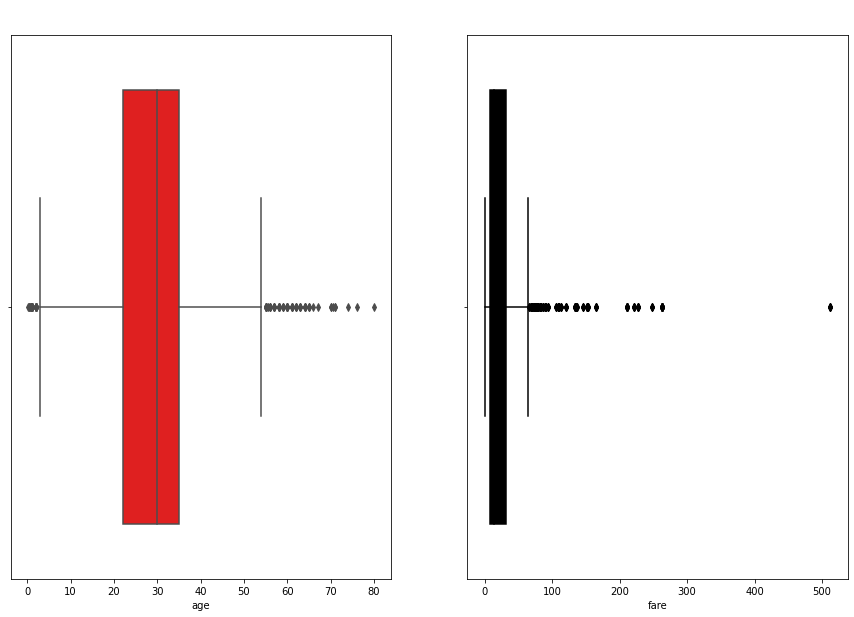

In [ ]:
#Checking for outliers in the continuous columns
import matplotlib.pyplot as plt
import seaborn as sns
#Defining the columns to check for outliers.
cols = ['age','fare']
#Defining the colors to be used in the boxplots
colors = ['red','black']
#Used a for loop to plot boxplots for each of the selected columns.
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')


There are a number of outliers in the age and fare columns but I'll not drop them in my analysis since I really want to find out the full circumstances and the extreme factors that might have caused the death of an individual.

# Data Exploration

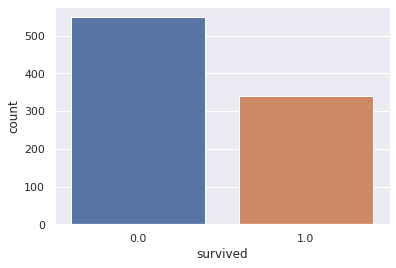

In [ ]:
#Visualizing the number of people who survived and died
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="survived", data=df)

The number of people who survived are around 550 passengers and the ones who survived are around 340. This shows the data is a bit imbalanced.

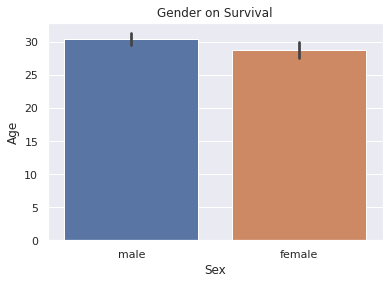

In [ ]:
#Visualizing the mean age of the people who survived based one gender.
df_1 = df.groupby('survived').mean()
df_1 = df_1.reset_index(inplace=True)

sns.barplot(x=df['sex'], y=df['age'], data=df_1)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Gender on Survival')
plt.show()

The mean age of the males who survived was around 30 and the mean age of the females who survived was around 28.

In [ ]:
#Changing the datatype of the pclass to category so that we can work with it in visualizing 
df['pclass'] = df['pclass'].astype('category')
#Defining the categorical columns in our dataset
categorical_columns = df[['pclass','sex','embarked']]

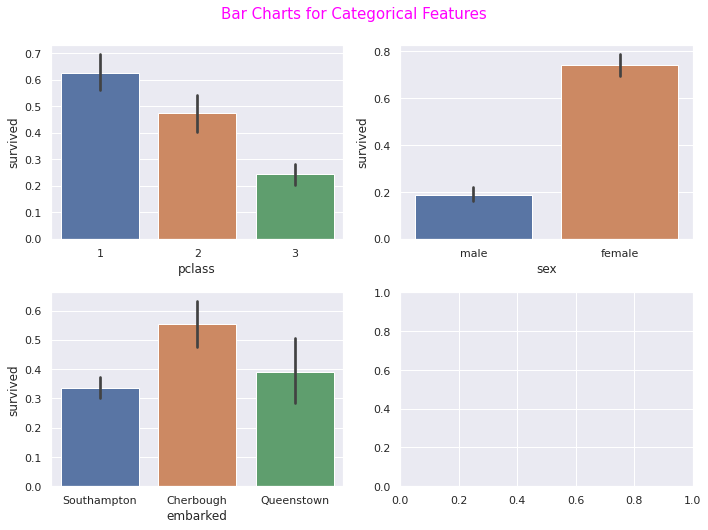

In [ ]:
#Finding out the survival rate among the categorical columns
# Setting the grid style of plots to dark
sns.set_style('darkgrid')    
# Ceating four subplots, in two rows and two columns                                         
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))    
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

# Iterating through the subplots
for ax, data, name in zip(axes.flatten(), df, categorical_columns):  
   # Creating a barchart in each subplot 
  sns.barplot(df[name], df.survived, ax = ax)                   
 # Fitting the subplots to avoid overlapping  
plt.tight_layout()  

Key takeways from the above visualization :


*   The first class had the highest rate of survival compared to the rest.
*   Females survived more than males. It was the law of the sea then that women are children should be saved first. This might have caused this.
*   People from Cherbough had the highest rate of survival followed by Queenstown then Southampton.



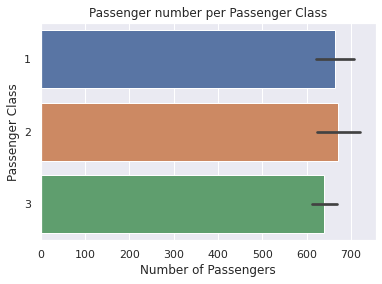

In [ ]:
#Visualizing the number of passengers per passenger class. 
df_2 = df.groupby('pclass').count()
df_2 = df_2.reset_index(inplace=True)

sns.barplot(x=df['passengerid'], y=df['pclass'], data=df_2)
plt.xlabel('Number of Passengers')
plt.ylabel('Passenger Class')
plt.title('Passenger number per Passenger Class')
plt.show()

The classes had almost the same number of passenegers. The 2nd class had the most number of passengers followed by the first class, then the third class.

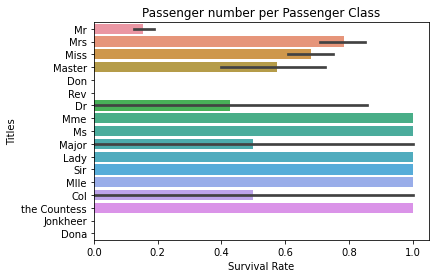

In [ ]:
#Visualizing Titles and their survival rate
df_7 = df.groupby('Title').count()
df_7 = df_7.reset_index(inplace=True)

sns.barplot(x=df['survived'], y=df['Title'], data=df_7)
plt.xlabel('Survival Rate')
plt.ylabel('Titles')
plt.title('Passenger number per Passenger Class')
plt.show()

It is observed that the Countess, Mille, Sir, Lady, Ms, Mme all survived the drown of the Titanic. This were British Royalties in early times thus might have been rescued faster than the rest.

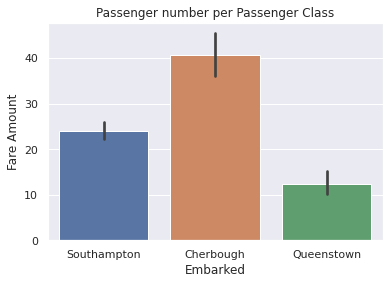

In [ ]:
#Visualizing the fare amount per embarked area.
df_5 = df.groupby('embarked').sum()
df_5 = df_5.reset_index(inplace=True)

sns.barplot(x=df['embarked'], y=df['fare'], data=df_5)
plt.xlabel('Embarked')
plt.ylabel('Fare Amount')
plt.title('Fare amount in an embarked area')
plt.show()

It is observed that Cherbough had the passengers paying the most amount followed by Southampton then Queestown.

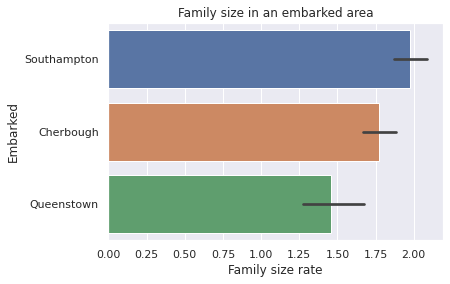

In [ ]:
#Visualizing the family size per embarked area.
df_6 = df.groupby('embarked').mean()
df_6 = df_6.reset_index(inplace=True)

sns.barplot(x=df['family_size'], y=df['embarked'], data=df_6)
plt.xlabel('Family size rate')
plt.ylabel('Embarked')
plt.title('Family size in an embarked area')
plt.show()

It is seen that Southampton had the biggest families, while Queesntown had the lowest number of people in a family.

In [ ]:
df['family_size'] = df['family_size'].astype('category')
df['survived'] = df['survived'].astype('float')

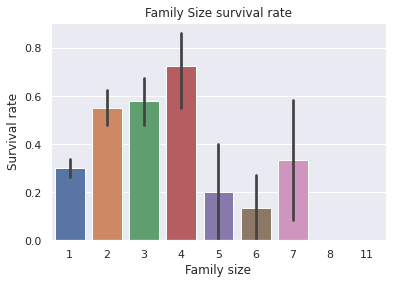

In [ ]:
#Visualizing survival rate per family size
df_6 = df.groupby('survived').count()
df_6 = df_6.reset_index(inplace=True)

sns.barplot(x=df['family_size'], y=df['survived'], data=df_6)
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.title('Family Size survival rate')
plt.show()

It is seen that families with 4 persons had the highest survival rate. The families with 6 person had the lowest survival rate. This are probably the ones who decided to have a honorable death together. Families with 2 or three person survived better as well.

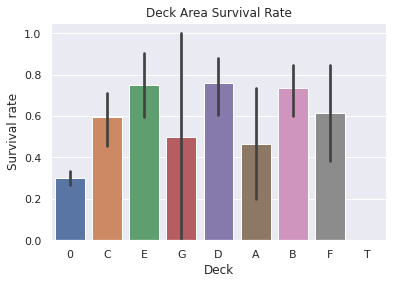

In [ ]:
#Visualzing the survival rate in the deck area in the ship
df_8 = df.groupby('survived').count()
df_8 = df_8.reset_index(inplace=True)

sns.barplot(x=df['deck'], y=df['survived'], data=df_8)
plt.xlabel('Deck')
plt.ylabel('Survival rate')
plt.title('Deck Area Survival Rate')
plt.show()

Key take aways for the above visualization: 


*   I will be ignoring the zeros since i used to fill out the missing values.
*   Deck E, Deck D and Deck B had the highest survival rates.
*   The individuals in deck T had no survival at all.

This shows the cabin column had important information that can be used in finding out the survival of a person in the Titanic drown.

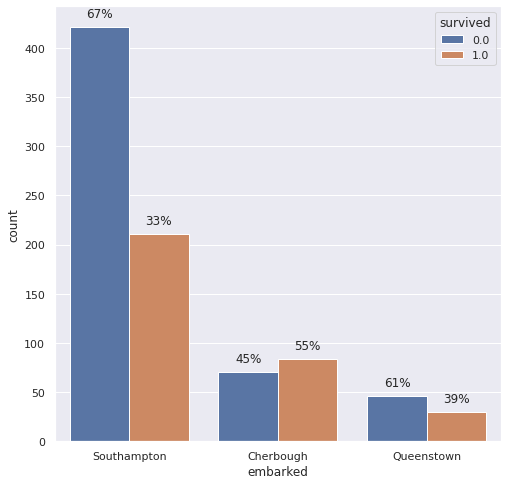

In [ ]:
#Visualzing survival rate per embarked area.
plt.figure(figsize=(8,8))
ax = sns.countplot(x='embarked',data=df,hue="survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
#Using a for loop to visualize the percentages for the right and left bar
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

Key take ways:


*   67% of passengers that embarked in Southampton died in the titanic drown while 33% survived
*   55% of passenegers that emabrked in Cherbough survived while 45% died in the drown.
*   61% of passenegrs that aboarded the Titanic in Queenstown died in the drown while 39% died in the drown.

It's only in Cherbough where the passenegers who aboarded survived more than the ones who died. Probably because Cherbough had the most royalties or women.


Results from the Exploratory Data Analysis

*   Our dataset was a bit imbalanced since it had more death cases.
*   The mean age of females and males who survived is same.
*   A person in the first class had a higher chance of survival.
*   A female had a higher chance of survival than a male.
*   A person who boarded the Titanic in Cherbough had a higher chance of survival.
*   A person bearing the titles; Countess, Mille, Sir, Lady, Ms and Mme had a higher chance of survival.
*  Persons in Cherbough were generally wealth since they are the ones who paid the most fare.
*  A person in Deck E, Deck D and Deck B had a higher chance of survival. Individuals in Deck T did not survive.



# Baseline Model

I'll be creating the baseline model to use it as reference. I'll be using the Logistic Regression since we working on a classification problem.

In [ ]:
#Defining the predictor variables and target variables in our dataset.
X = train.drop(['survived'],axis=1)
y = train['survived']
#One hot encoding our data for the categorical variables
X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
#Importing the Logistic Regression and the StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Fitting the data in a logistic regression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
#Predicting classification using the test set
y_predict = regressor.predict(X_test)
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[86 19]
 [25 48]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       105
           1       0.72      0.66      0.69        73

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



The f1 score of the baseline model is at 80% meaning that we have a generally low false positives and low false negatives.

The accuracy of the model is at 75% meaning that the model has not hit our metric for success.

# Multivariate Analysis

This is normally based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcomes variables at a time. Multi-variate analysis enables:

*  The exploration of data structures and patterns.
*  Probability computations of multi-dimensional regions.
*  The study and measurement of relationships.
*  Normal and general multivariate models and distribution theory. 


There are three multivariate techniques namely : Principal Component Analysis, Factor Analysis and Linear Discriminant Analysis.
Linear Discriminant Analysis is a linear transformation technique while the Principal Component Analysis is an unsupervised linear transformation technique since it ignores class labels.

We are doing the Supervised Learning Algorithm therefore I will perform the Linear Discriminant Analysis.

In [ ]:
# applying Linear Discriminant Analysis
# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
title_Master,9.791736e-01
fare,3.282511e-01
deck_D,2.487148e-01
title_Sir,2.334805e-01
deck_E,2.176159e-01
deck_F,1.375845e-01
title_Major,1.304600e-01
embarked_Queenstown,1.291432e-01
title_Mrs,1.150032e-01
title_Ms,5.565822e-02


According to the Linear Discriminant Analysis, the following factors or circumstances determined one's survival:


*   the Title Master
*   Fare amount
*   The Deck D
*   The title Sir
*   The Deck E
*   The Deck F
*   The title Mayor
*   The port Queenstown and
*   The title Mrs

The factors an individual would have had and caused their death is the:

*  The gender of the passenger.
*  The passenger class.
*  The family size.
*  The age of the passenger.
*  Whether the passenger embarked in southampton.
*  The Title Miss.
*  The Title Rev.
*  Deck B

# Checking for Multi-Collinearity

Checking for Multi-Collinearity
The key goal of regression analysis is to isolate the relationship between each independent variables and the independent variable. The coefficient estimates can swing wildly based on which other independent variables are in the model. Multi-collinearity reduces the precision of the estimate co-efficients which weakens the statistical power of the regression model and that is why it is important for us to remove the multicollinear variables to be able to build an efficient model.

In [ ]:
#Creating a dataframe for the correlations in our dataset.
correlations = train.corr()
correlations

,survived,pclass,age,fare,family_size
survived,1.000000,-0.335549,-0.075030,0.255290,0.018277
pclass,-0.335549,1.000000,-0.327273,-0.548193,0.064221
age,-0.075030,-0.327273,1.000000,0.088210,-0.247738
fare,0.255290,-0.548193,0.088210,1.000000,0.218658
family_size,0.018277,0.064221,-0.247738,0.218658,1.000000


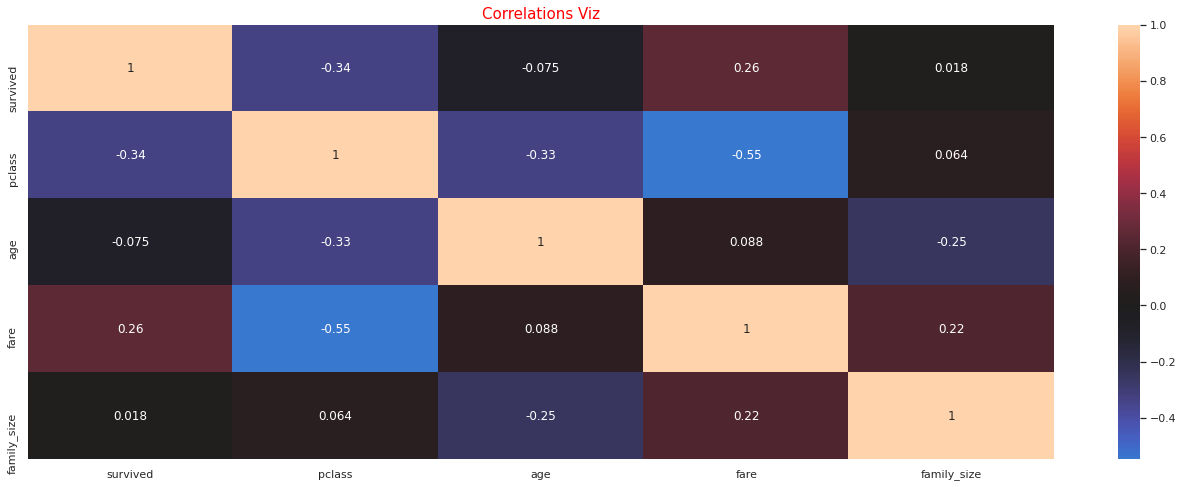

In [ ]:
#Visualzing the correlations in our dataset
plt.figure(figsize = (23, 8))
sns.heatmap(correlations, annot = True, center = 0)
plt.title('Correlations Viz', fontsize = 15, color = 'red')
plt.show()

Key take aways:



*   As the classes increase that is (1-3) the fare also increases thus having the negative correlation of -0.55. This means there is a relation between fare and pclass.
*   There is also a slight correlation between fare and family size of 0.22.
*   There is also a slight correlation between fare and one's survival of 0.26.
*   There is also a slight correlation of age and pclass. Meaning the aged individuals were better economically thus boarding on the first class.
*   There is also a correlation between one's survival and pclass. Meaning th well economic individuals were given priority.



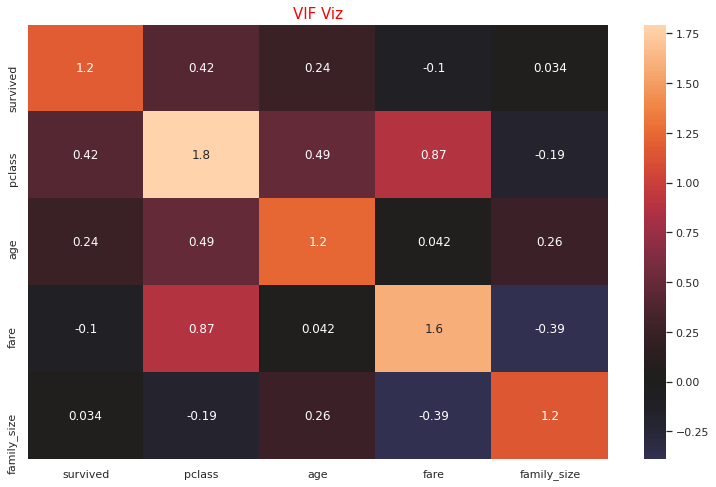

In [ ]:
#Visualzing the VIF Score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
vif = pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)
plt.figure(figsize = (13, 8))
sns.heatmap(vif, annot = True, center = 0)
plt.title('VIF Viz', fontsize = 15, color = 'red')
plt.show()

There is no multi-collinearity in our independent variables.

# KNearest Neighbors

The K Nearest Neighbors commonly known as the k-NN is a type of instance based learning, or lazy learning where the function is only approximated locally and all computation is deferred until function evaluation. 

The k-NN is a non parametric method that does not make any assumptions of the underlying data distribution. Therefore we need no prior fitting or transformation of the data. But we will standardize our numerical columns for better analysis.

In [ ]:
#Defining the predictor variables and target column
X = train.drop(['survived'],axis=1)
y = train['survived']
#Importing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Standardizing our numerical columns which are the age and fare columns
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])
#One hot encoding any categorical columns in our dataset
X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset into the test and train 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
#Fitting our data in the KNeighbors Clasifier
from sklearn.neighbors import KNeighborsClassifier 
#Choosing an odd number 3 to help us classify our data
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Predict new values using our test data
y_pred = classifier.predict(X_test)
#Importing the metrics to be used
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[92 15]
 [17 54]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.78      0.76      0.77        71

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



The f1 score of Knearest Neighbors rised from 80% to 85%. The accuracy score also rose from 75% to 82%. Our model is perfroming better. I will do hyperparameter tuning an find the optimal parameters for our model.

Hyper parameter tuning

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

In [ ]:
#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)

In [ ]:
#Checking the performance of our model with a single dicriminant component.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#Fitting the train data into our model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1,

In [ ]:
#Printing out the best parameters
clf.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 29, 'p': 1}

The optimal leaf size is 1
The optimal K nearest neighbors is 10
And the optimal p is 1

In [ ]:
#Fitting the parameters into our model
classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=29,p=1,metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=1,
                     weights='uniform')

In [ ]:
#Predicting values using our test set
y_predict = classifier.predict(X_test)
#Printing out the metrics for assessing the model's perfromance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[92 15]
 [17 54]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.78      0.76      0.77        71

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



The Accuracy and the f1 score for the tuned and untuned models remained the same. Hence we can go with the untuned model.

I used a for loop to find the optimal test size for the model.

In [ ]:
#Defining the list of test sizes we will use for the assessment
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
#Importing necessary libraries for the assessment
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#Uing a for loop to split the dataset fit it with the optimal parameters then assess using the accuracy score.
for test in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 12)
    
    # fitting to classifier
    classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=29,p=1,metric='manhattan')
    classifier.fit(X_train, y_train)
    
    # making predictions
    y_pred = classifier.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), metrics.accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.8764044943820225
Test size 0.2 has accuracy score: 0.8370786516853933
Test size 0.3 has accuracy score: 0.8314606741573034
Test size 0.4 has accuracy score: 0.8370786516853933
Test size 0.5 has accuracy score: 0.8089887640449438


I found that test size of 10% made the best accuracy of 87% surpassing our metric of success. 

# Challenging the Solution.

I found that the test size of 10% made the best accuracy of 88% therefore this can be improved during the next modelling.

The missing data in our dataset especially in the cabin dataset made us lose very important information on the position an individual one was in the voyage. 

Though the k-NN algorithm was a fairly good algorithm to use, I will be using the Random Forest model to see whether the accuracy for our classification can improve since of its robustness of higher levels of accuracy in classification.

In [ ]:
#Defining the predictor variables and target column
X = train.drop(['survived'],axis=1)
y = train['survived']
#Importing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Standardizing our numerical columns which are the age and fare columns
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])
#One hot encoding any categorical columns in our dataset
X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset into the test and train 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
#Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
#Fitting the model in our data
forest  = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=5,max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting the classification using the test data
y_pred = forest.predict(X_test)

In [ ]:
#Printing out the metrics we will be suing in our analysis.
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53  4]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.86      0.78      0.82        32

    accuracy                           0.88        89
   macro avg       0.87      0.86      0.86        89
weighted avg       0.88      0.88      0.87        89



Our Random Forest Model has an accuracy of 88% thus making also a good model for the analysis. This model can also be used for the predictions.

In [ ]:
#Printing out the most important features in the Random Forest Classification
important_feat = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
sex_male,0.255187
title_Mr,0.210823
pclass,0.098523
fare,0.093875
age,0.065729
family_size,0.061637
title_Mrs,0.061611
title_Miss,0.052535
embarked_Southampton,0.023686


According to the Random Forest model the sex and the title Mr were the two most important features in classification.

# Conclusion

The following are what I derived from my analysis :

*   A person in the first class had a higher chance of survival.
*   A female had a higher chance of survival than a male.
*   A person who boarded the Titanic in Cherbough had a higher chance of survival.
*   A person bearing the titles; Countess, Mille, Sir, Lady, Ms and Mme had a higher chance of survival.
*  Persons in Cherbough were generally wealth since they are the ones who paid the most fare.
*  A person in Deck E, Deck D and Deck B had a higher chance of survival. Individuals in Deck T did not survive.


The k-NN tuned algorithm with a test size of 10% did a good job in predicting whether the individual will survive. We used 29 neighbours as the optimal number of neighbors to classify an individual. I also used the manhattan metric and one Linear Discriminant Analysis is optimizing my model. The model achieved an accuracy of 87% surpassing my metric of success of 85%. Therefore I achieved my goal for this project.

The Random Forest Model is also a good fit for this data since it also achieved an accuracy of 88%.